> By Nabankur Ray, PGP-DSBA

# **Problem Statement - UL Project - Coded**

**Context**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help






**Objective**

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.





**Data Description:**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).



**Data Dictionary**

**Sl_No:** Primary key of the records

**Customer Key:** Customer identification number

**Average Credit Limit:** Average credit limit of each customer for all credit cards

**Total credit cards:** Total number of credit cards possessed by the customer

**Total visits bank:** Total number of visits that the customer made (yearly) personally to the bank

**Total visits online:** Total number of visits or online logins made by the customer (yearly)

**Total calls made:** Total number of calls made by the customer to the bank or its customer service department (yearly)

# **Understanding the data**

## Importing necessary libraries

In [62]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [63]:
# loading the data from drive
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/UL-Coded-Credit+Card+Customer+Data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Overview of the Dataset

In [64]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [65]:
# viewing the last 5 rows of the data
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [66]:
# Checking the shape of the dataset
data.shape

(660, 7)

* There are **660 rows** and **7 Columns** are present in the given datasets.

### Displaying few rows of the dataset

In [67]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Checking the data types of the columns for the dataset

In [68]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* It can be observed that no columns have less entries (less than 660 rows) which indicates that there are no missing values in the given dataset.

* Here, all the columns are numerical (int data type).

* Dependent variable is the "Total calls made" which is of numerical type.

### Creating a copy of original data

In [69]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [70]:
# checking for duplicate values
df.duplicated().sum()

0

In [71]:
# checking for missing values in the data
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


• There is no missing values.

• There is no duplicate values.

• There is no null values.


### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [72]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


•	The **Customer Key** values range widely from 11,265 to 99,843, with a mean of 55,141. This suggests a diverse set of customer identifiers across the dataset.

•	The **Avg_Credit_Limit** shows significant variability, with a mean of 34,574, but ranging from as low as 3,000 to as high as 200,000. This could indicate a wide range of credit profiles among the customers, with a notable difference in credit limits.

•	The average number of credit cards held by customers is approximately 4.7, with a standard deviation of about 2.2. Most customers have between 3 and 6 credit cards, but there are some customers with up to 10 cards.

•	The **Total_visits_bank** and **Total_visits_online** variables show similar averages, around 2.4 and 2.6, respectively. However, the online visits have a higher standard deviation, indicating more variability in online interactions. This could suggest that while many customers interact similarly in person and online, some rely much more heavily on online channels.

•	The **Total_calls_made** metric has a mean of about 3.6, with a fairly large spread (standard deviation of 2.87). The maximum value is 10, indicating that some customers make frequent calls, perhaps for support or inquiries.

•	For most metrics (like credit limit, visits, and calls), the median (50th percentile) is closer to the lower end than the upper end, suggesting a right-skewed distribution. For example, in Avg_Credit_Limit, the median is 18,000, which is lower than the mean of 34,574, indicating that a few high-value customers drive up the average.


# **Exploratory Data Analysis**

### Univariate analysis

<Figure size 1500x1000 with 0 Axes>

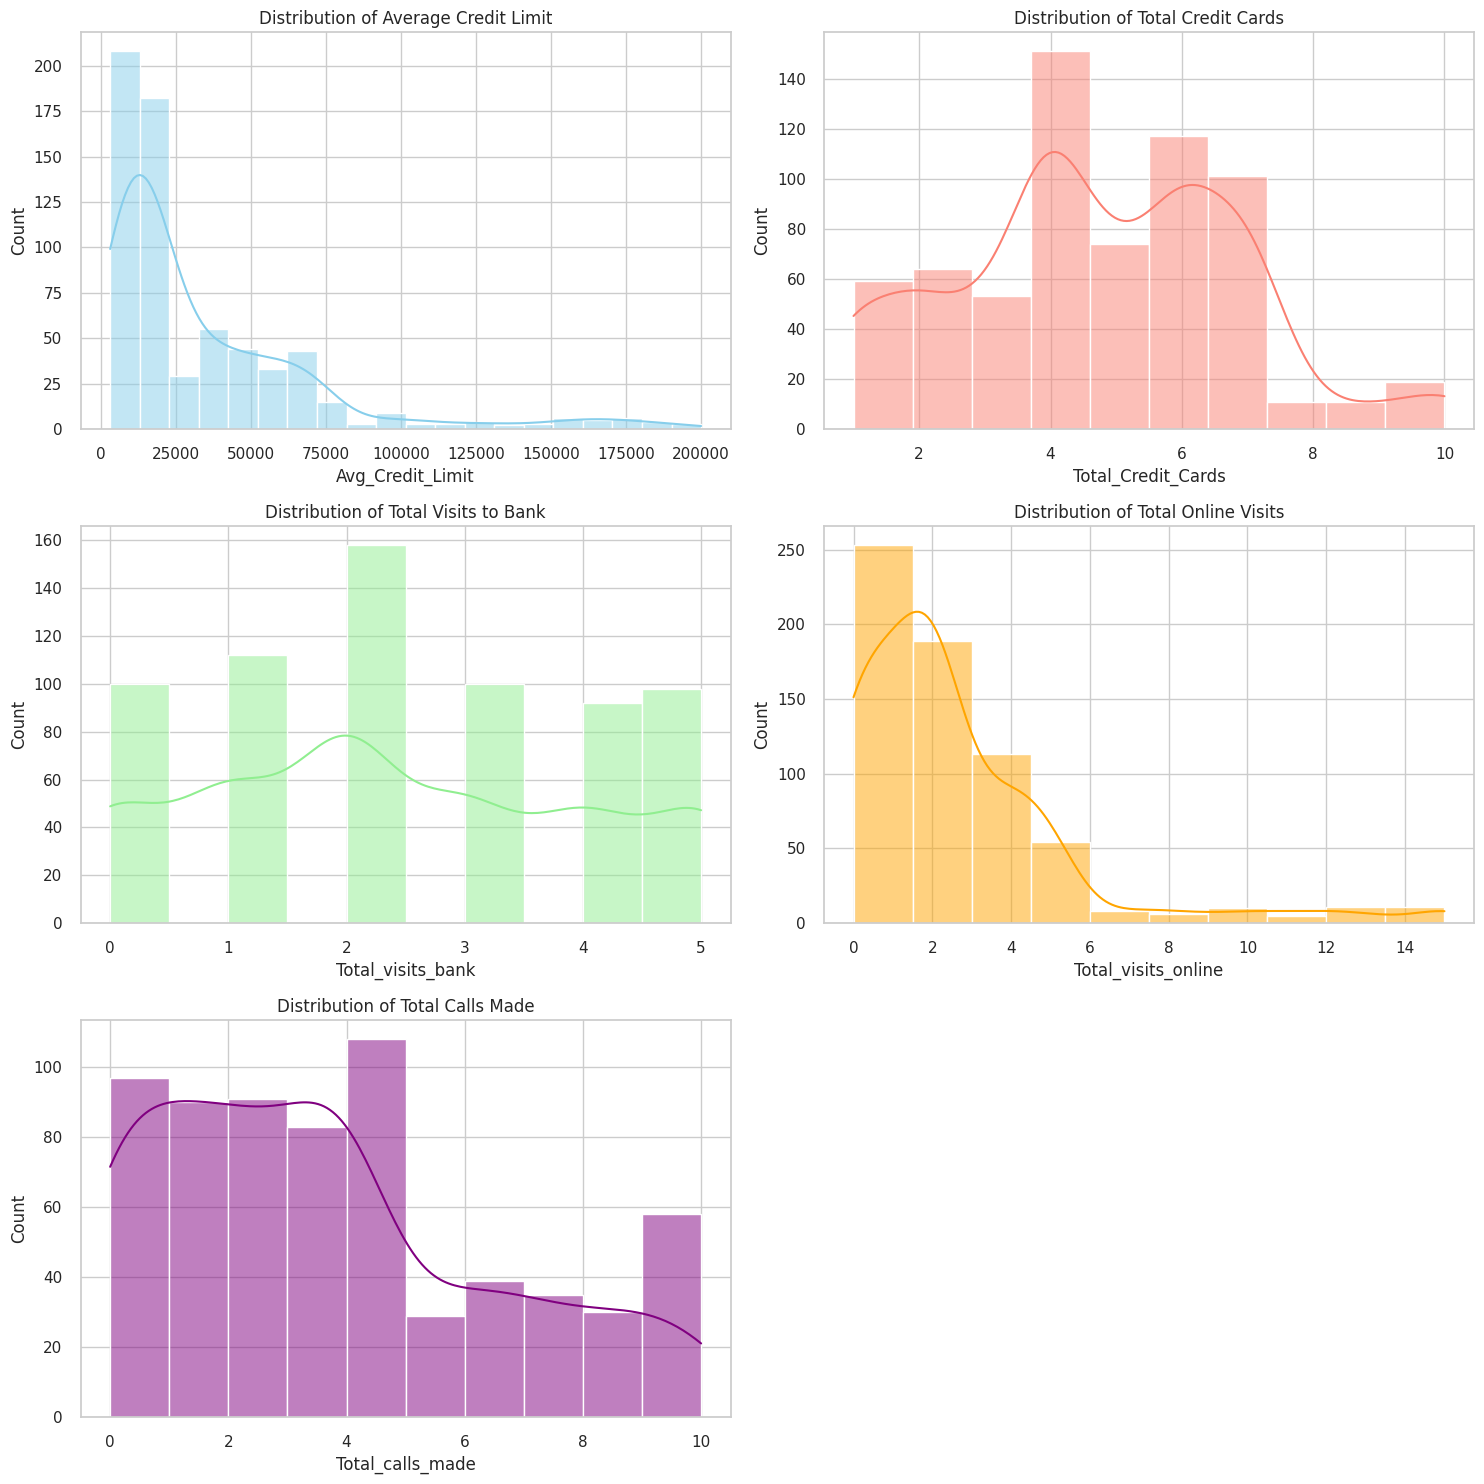

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Univariate Analysis for each feature
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot Avg_Credit_Limit
sns.histplot(data['Avg_Credit_Limit'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of Average Credit Limit")

# Plot Total_Credit_Cards
sns.histplot(data['Total_Credit_Cards'], bins=10, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribution of Total Credit Cards")

# Plot Total_visits_bank
sns.histplot(data['Total_visits_bank'], bins=10, kde=True, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Distribution of Total Visits to Bank")

# Plot Total_visits_online
sns.histplot(data['Total_visits_online'], bins=10, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of Total Online Visits")

# Plot Total_calls_made
sns.histplot(data['Total_calls_made'], bins=10, kde=True, ax=axes[2, 0], color="purple")
axes[2, 0].set_title("Distribution of Total Calls Made")

# Remove any empty subplots
fig.delaxes(axes[2, 1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



In [74]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [75]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`Avg_Credit_Limit`**

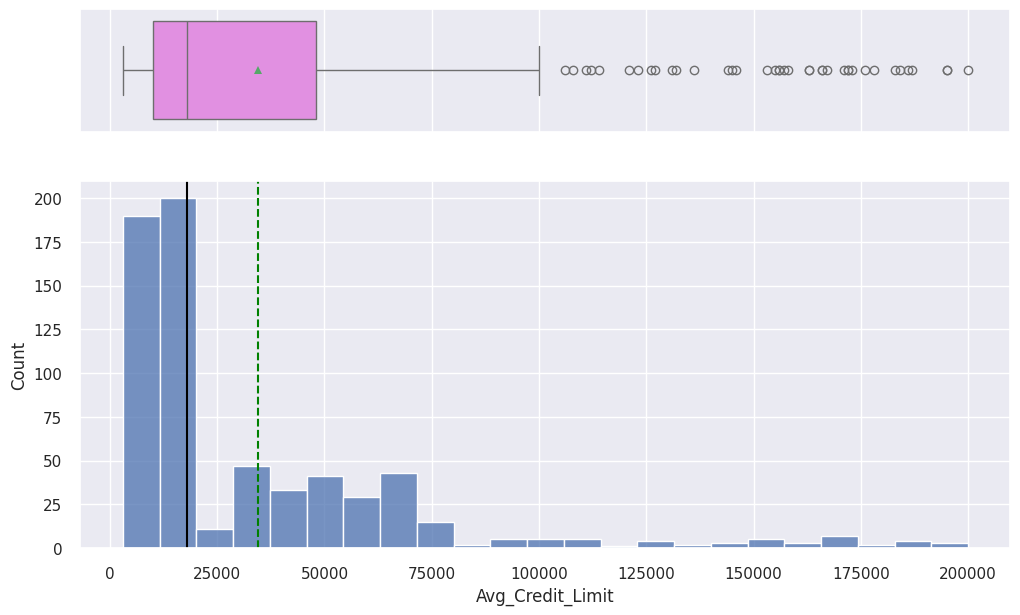

In [ ]:
histogram_boxplot(df, 'Avg_Credit_Limit')

**`Total_Credit_Cards`**

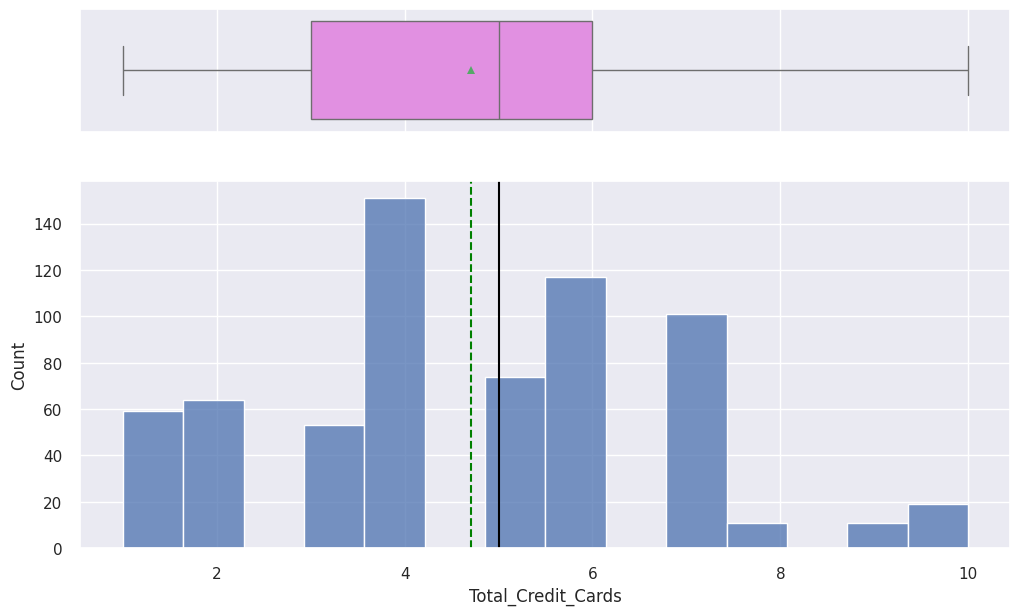

In [ ]:
histogram_boxplot(df, 'Total_Credit_Cards')

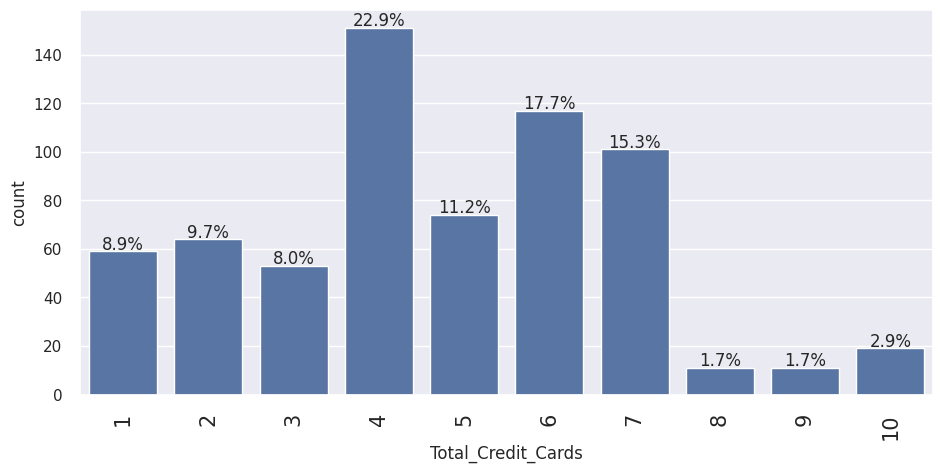

In [ ]:
labeled_barplot(df, 'Total_Credit_Cards', perc=True)

**`Total_visits_bank`**

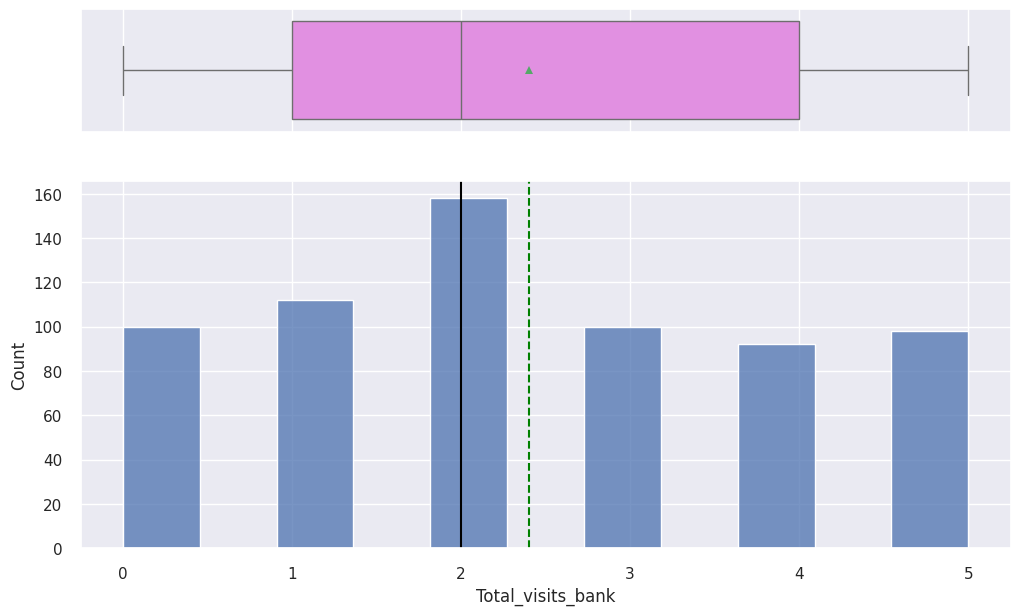

In [ ]:
histogram_boxplot(df, 'Total_visits_bank')

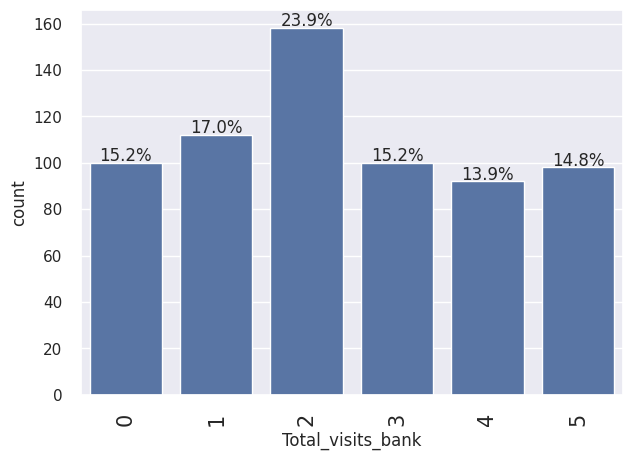

In [ ]:
labeled_barplot(df, 'Total_visits_bank', perc=True)

**`Total_visits_online`**

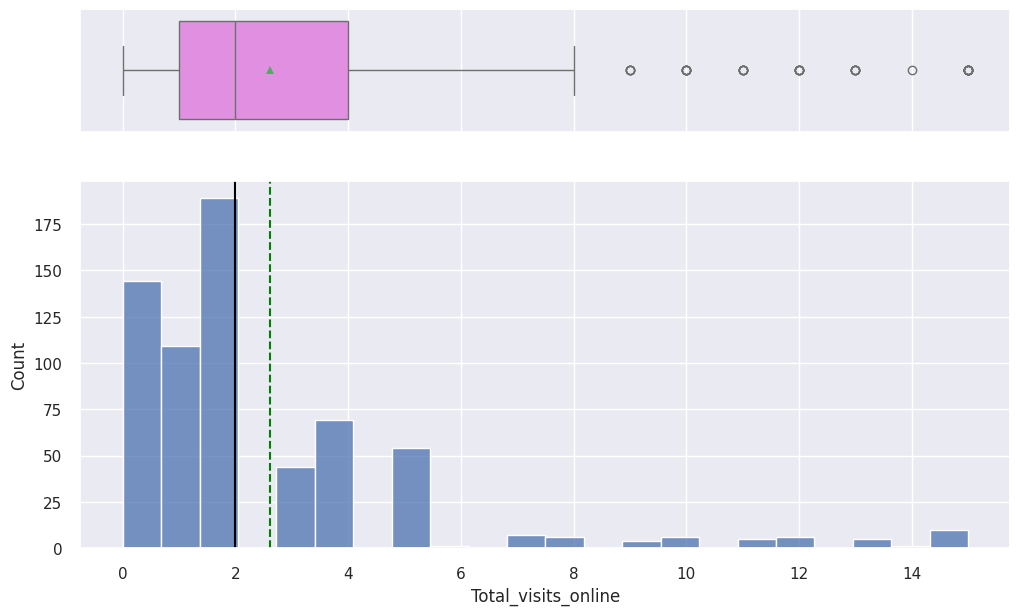

In [ ]:
histogram_boxplot(df, 'Total_visits_online')

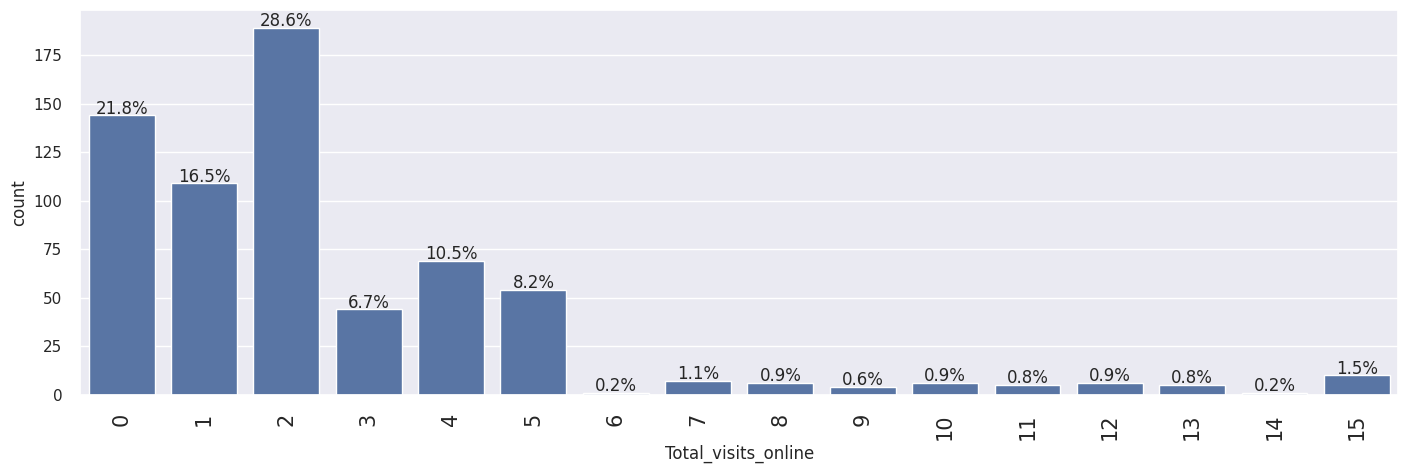

In [ ]:
labeled_barplot(df, 'Total_visits_online', perc=True)

**`Total_calls_made`**

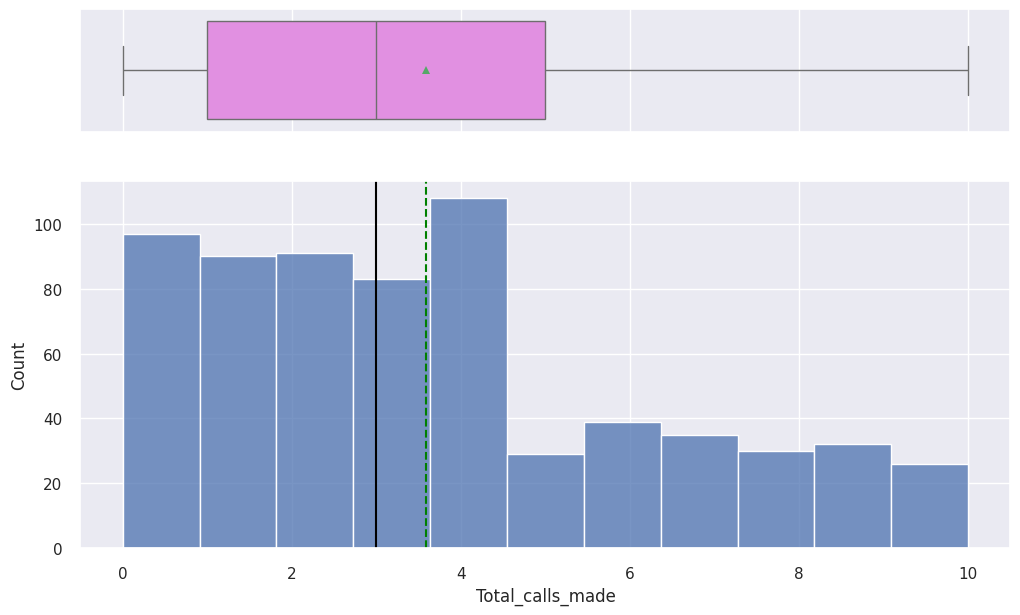

In [ ]:
histogram_boxplot(df, 'Total_calls_made')

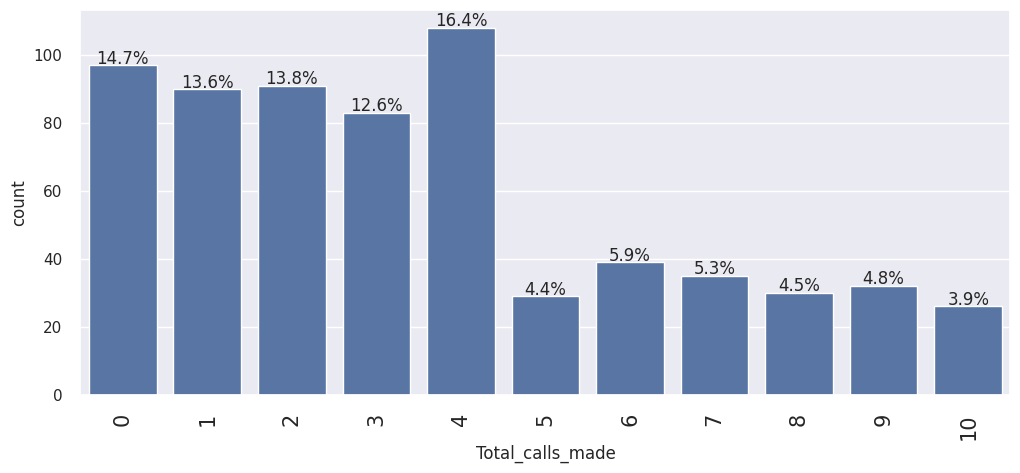

In [ ]:
labeled_barplot(df, 'Total_calls_made', perc=True)

Avg_Credit_Limit: The distribution is right-skewed, indicating that most customers have lower credit limits, with only a few having high credit limits.

Total_Credit_Cards: The distribution suggests that customers typically have between 2 to 6 credit cards, with fewer customers holding an unusually high number.

Total_visits_bank: The majority of customers make very few in-person visits to the bank, with most values clustering around zero, indicating a preference for other service channels.

Total_visits_online: Many customers frequently use online channels, with some making more than 10 online visits per year.

Total_calls_made: Similar to online visits, customers make a substantial number of calls, though the frequency varies, suggesting that calls may be a secondary channel after online visits.


## Bivariate Analysis

In [77]:
num_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

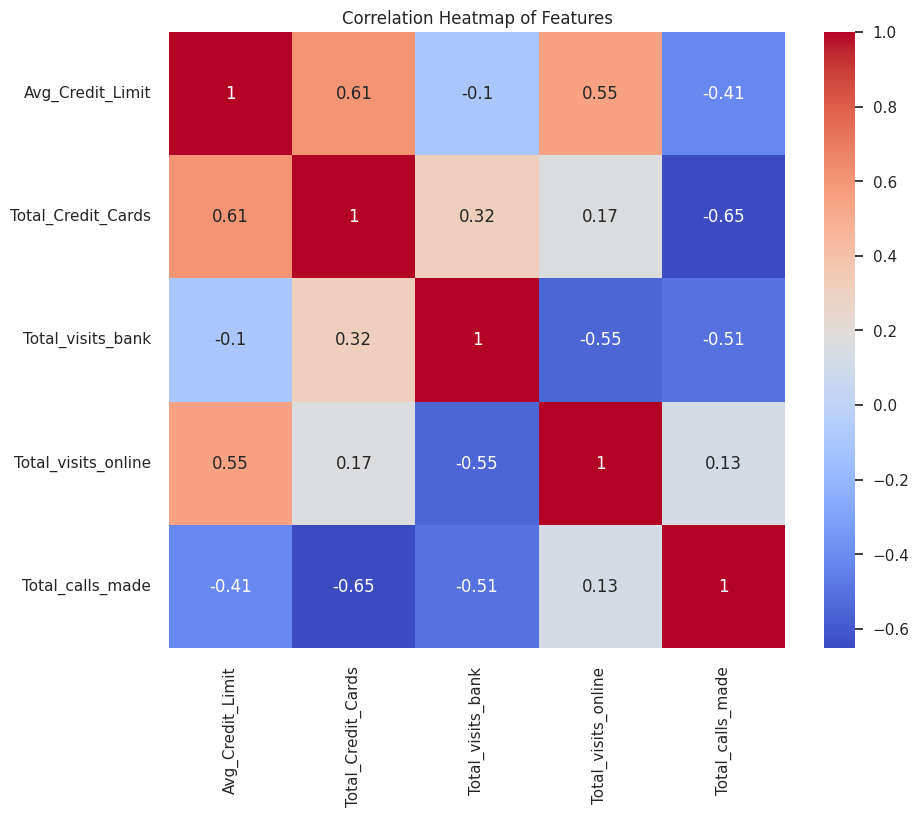

In [81]:
# Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_col].corr()

# Plotting the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()


•	Avg_Credit_Limit and Total_Credit_Cards: There is a moderate positive correlation, suggesting that customers with more credit cards tend to have higher average credit limits.

•	Total_visits_online and Total_calls_made: A positive correlation exists, indicating that customers who frequently visit online channels also tend to make more calls, possibly reflecting a segment that prefers remote service channels.

•	Total_visits_bank: This variable has weak correlations with other variables, implying that in-person visits do not strongly align with spending behavior or remote service usage.


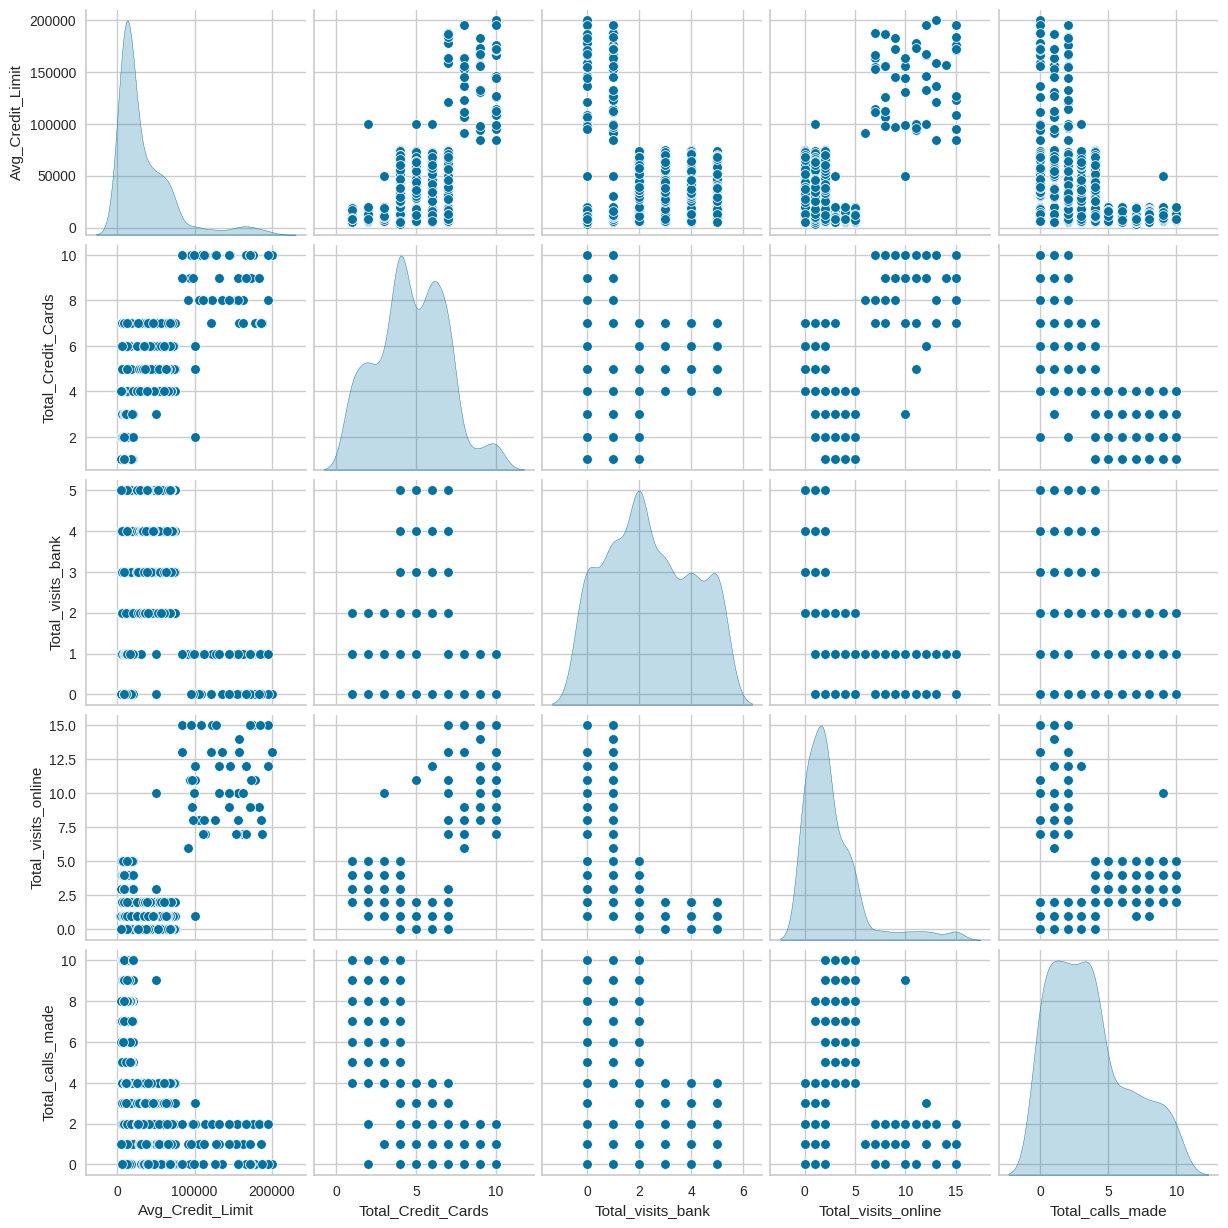

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

# **Data Preprocessing**

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

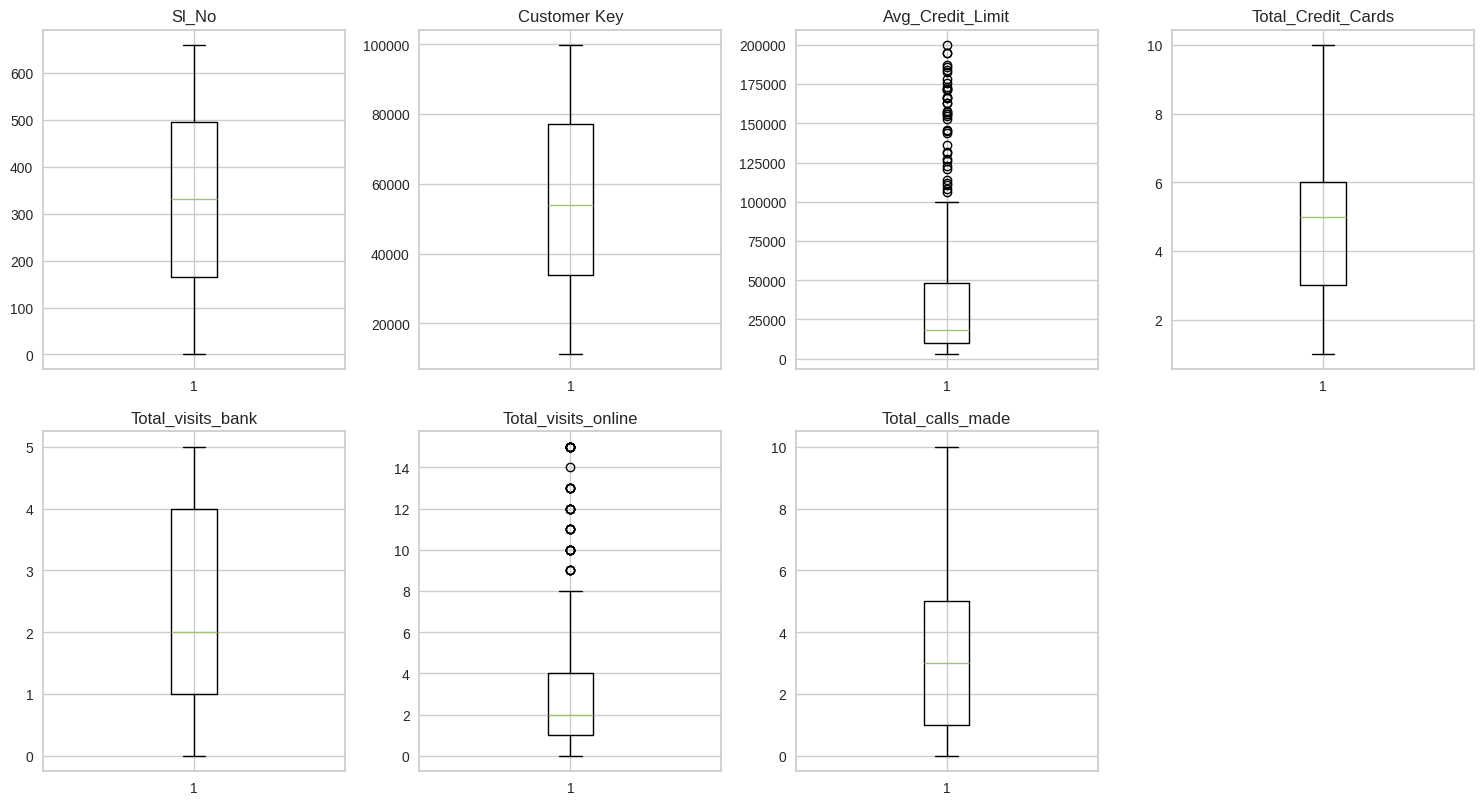

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

•	Total_credit_cards, Total_visits_bank, Total_calls_made don’t have visible outliers. Therefore, no need to outlier treatment.

•	Avg_Credit_Limit: This variable has a significant number of outliers on the higher end. The distribution is skewed, with many data points lying above the upper quartile. This indicates that while most customers have an average credit limit within a lower range, a few customers have high credit limits. The outliers in this case are normal. Therefore, no need to outlier treatment.

•	Total_visits_online: This variable has a few outliers above the upper quartile, indicating that while most customers visit the online portal a relatively low number of times, some customers have a significantly higher frequency of online visits. The outliers in this case are also normal. Therefore, no need to outlier treatment.


### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# **K-means Clustering**

### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.7178787250175898
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0902973540817666
Number of Clusters: 5 	Average Distortion: 0.9906853650098948
Number of Clusters: 6 	Average Distortion: 0.9515009282361341
Number of Clusters: 7 	Average Distortion: 0.9094119827472316
Number of Clusters: 8 	Average Distortion: 0.9191292344244387
Number of Clusters: 9 	Average Distortion: 0.8990131857179275
Number of Clusters: 10 	Average Distortion: 0.8723089051392604
Number of Clusters: 11 	Average Distortion: 0.8353621156593081
Number of Clusters: 12 	Average Distortion: 0.80956116944126
Number of Clusters: 13 	Average Distortion: 0.7950761910849837
Number of Clusters: 14 	Average Distortion: 0.7740825528304727


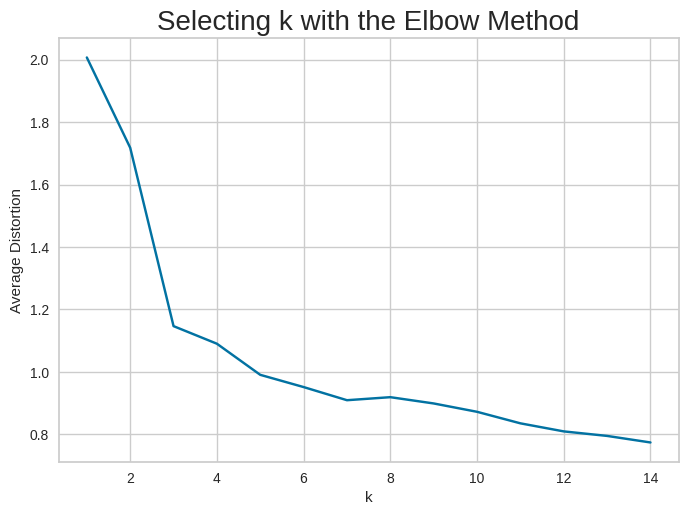

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

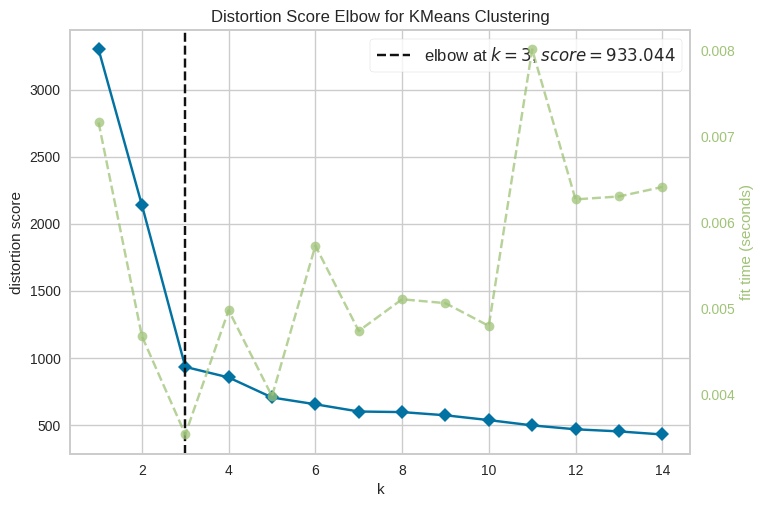

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.5703183487340514)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3744071798973986)
For n_clusters = 5, the silhouette score is 0.27167502160723267)
For n_clusters = 6, the silhouette score is 0.24804756291576194)
For n_clusters = 7, the silhouette score is 0.24791254258020035)
For n_clusters = 8, the silhouette score is 0.22570382558070443)
For n_clusters = 9, the silhouette score is 0.19931783829027247)
For n_clusters = 10, the silhouette score is 0.20939001908412339)
For n_clusters = 11, the silhouette score is 0.21874494421167007)
For n_clusters = 12, the silhouette score is 0.21076471529358776)
For n_clusters = 13, the silhouette score is 0.2110262471212854)
For n_clusters = 14, the silhouette score is 0.21513441980318038)


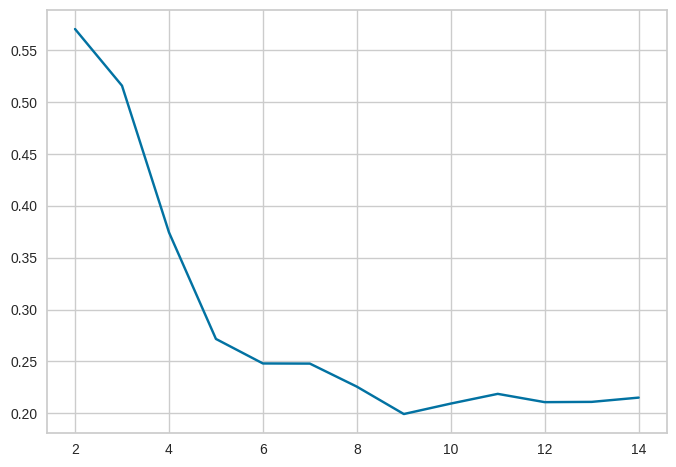

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

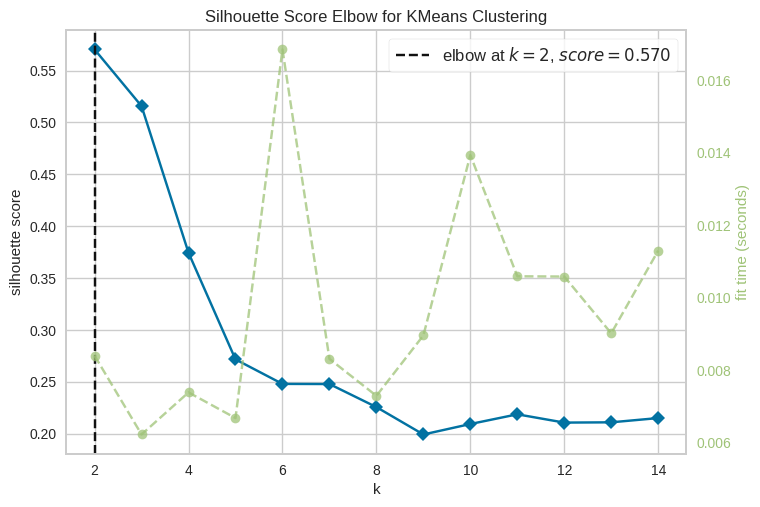

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

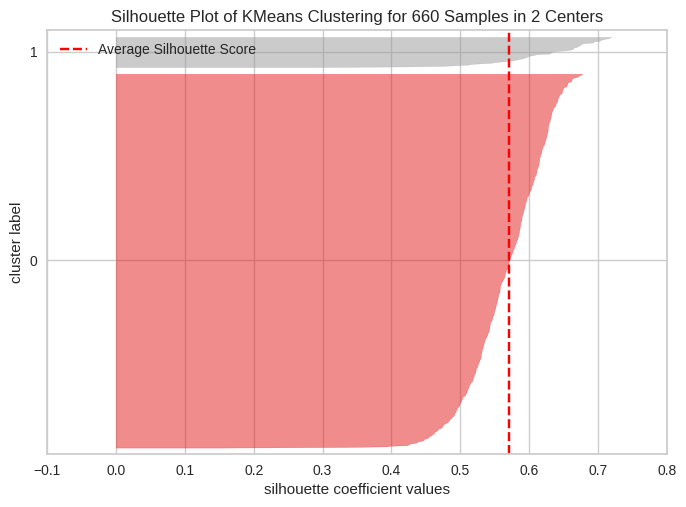

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

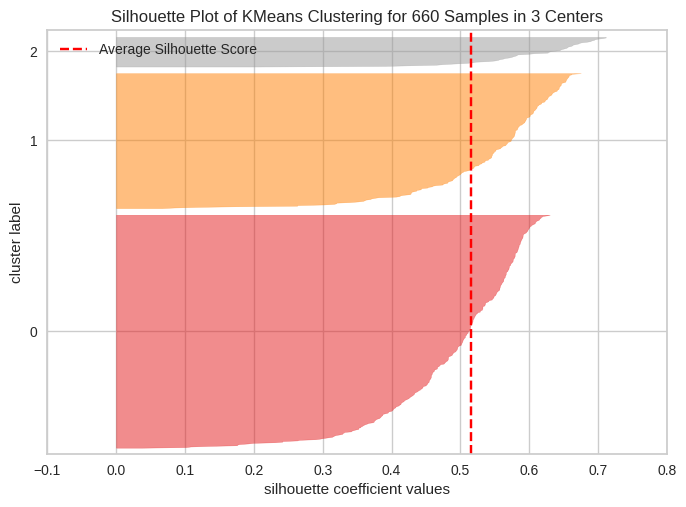

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

Let's take 3 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 3 in the elbow curve.

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
numeric_df1 = df1.select_dtypes(include='number')

km_cluster_profile = numeric_df1.groupby("KM_segments").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Customer Key"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [ ]:
## Code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following Customers are present with Customer ID:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following Customers are present with Customer ID:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437 22610
 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897 46223
 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886 66804
 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376 98126
 80347 17649 62807 92522 57459 44579 45476 61994 11398 2

In [ ]:
df1.groupby(["KM_segments"])['Customer Key'].count()

,Customer Key
KM_segments,
0,386
1,224
2,50


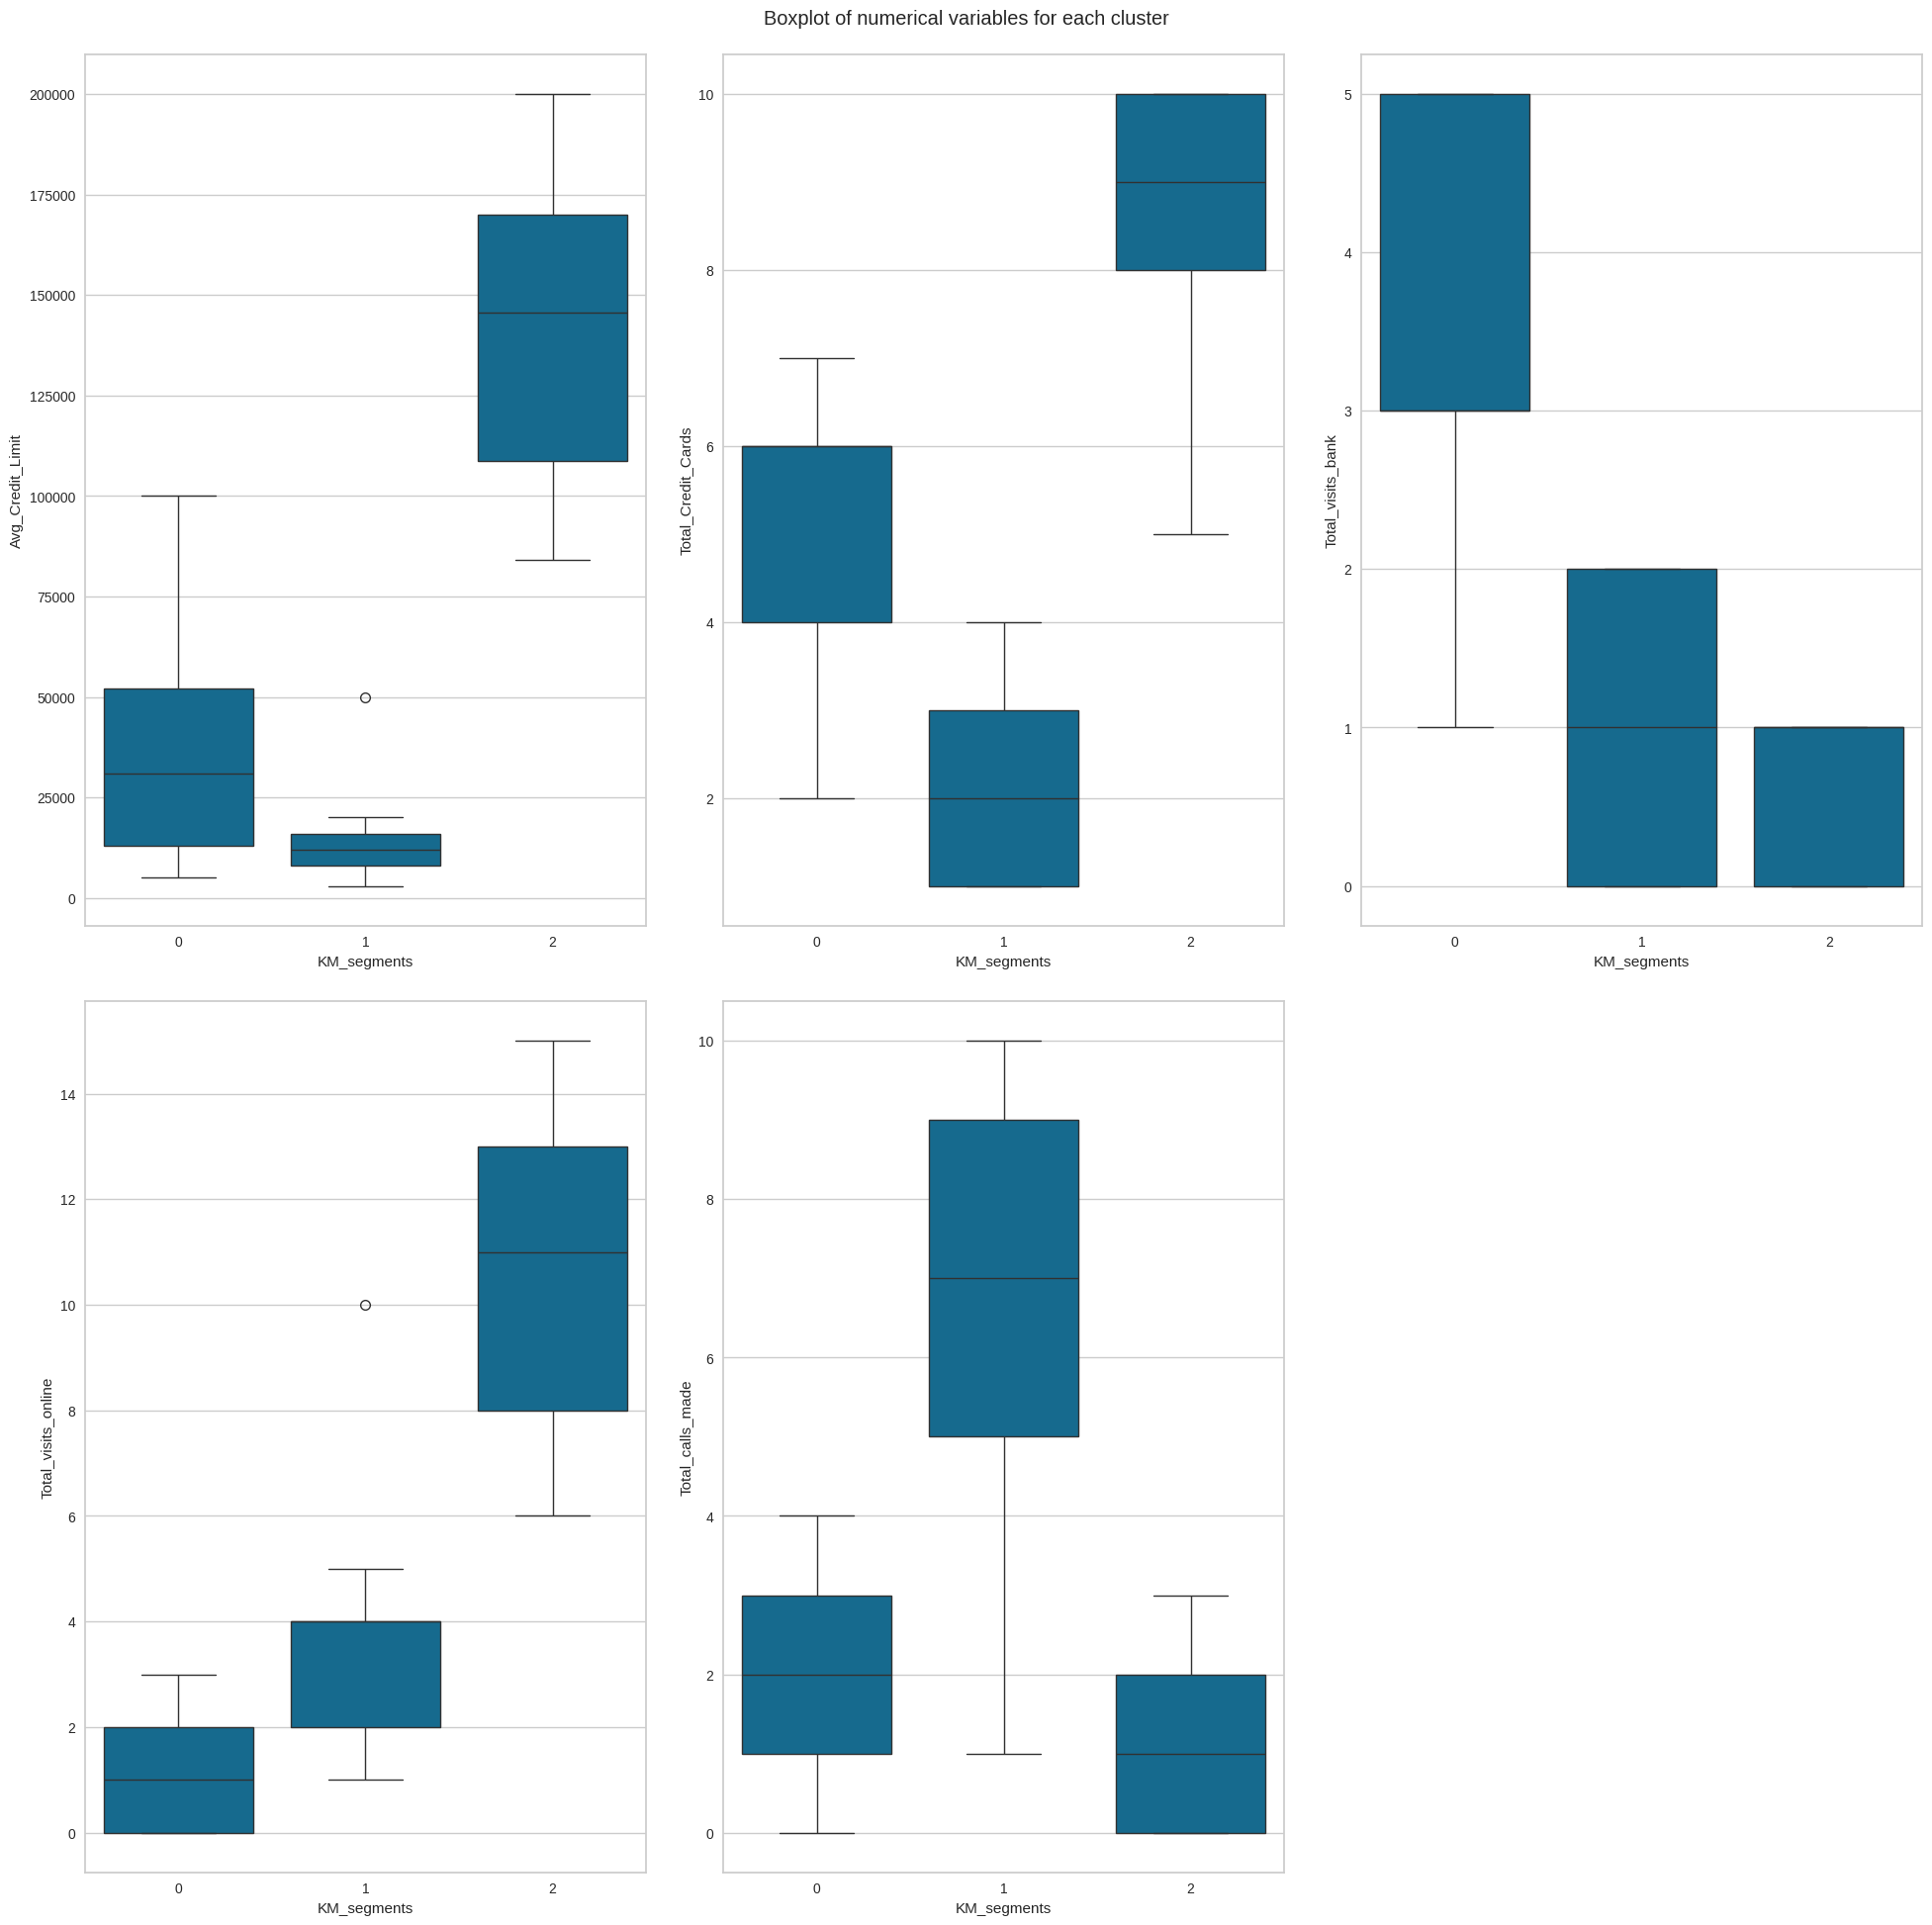

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

Cluster 0: These are medium credit limit customers with a moderate number of credit cards. They tend to visit the bank more than using online services or calling.

Cluster 1: These customers have low credit limits and fewer credit cards. They prefer online channels and make frequent calls to customer service, possibly due to service or support needs.

Cluster 2: High-value customers with large credit limits and many cards. They predominantly use online channels and rarely call or visit the bank, likely indicating high digital engagement.


# **Hierarchical Clustering**

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.
****************************************************************************************************
Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

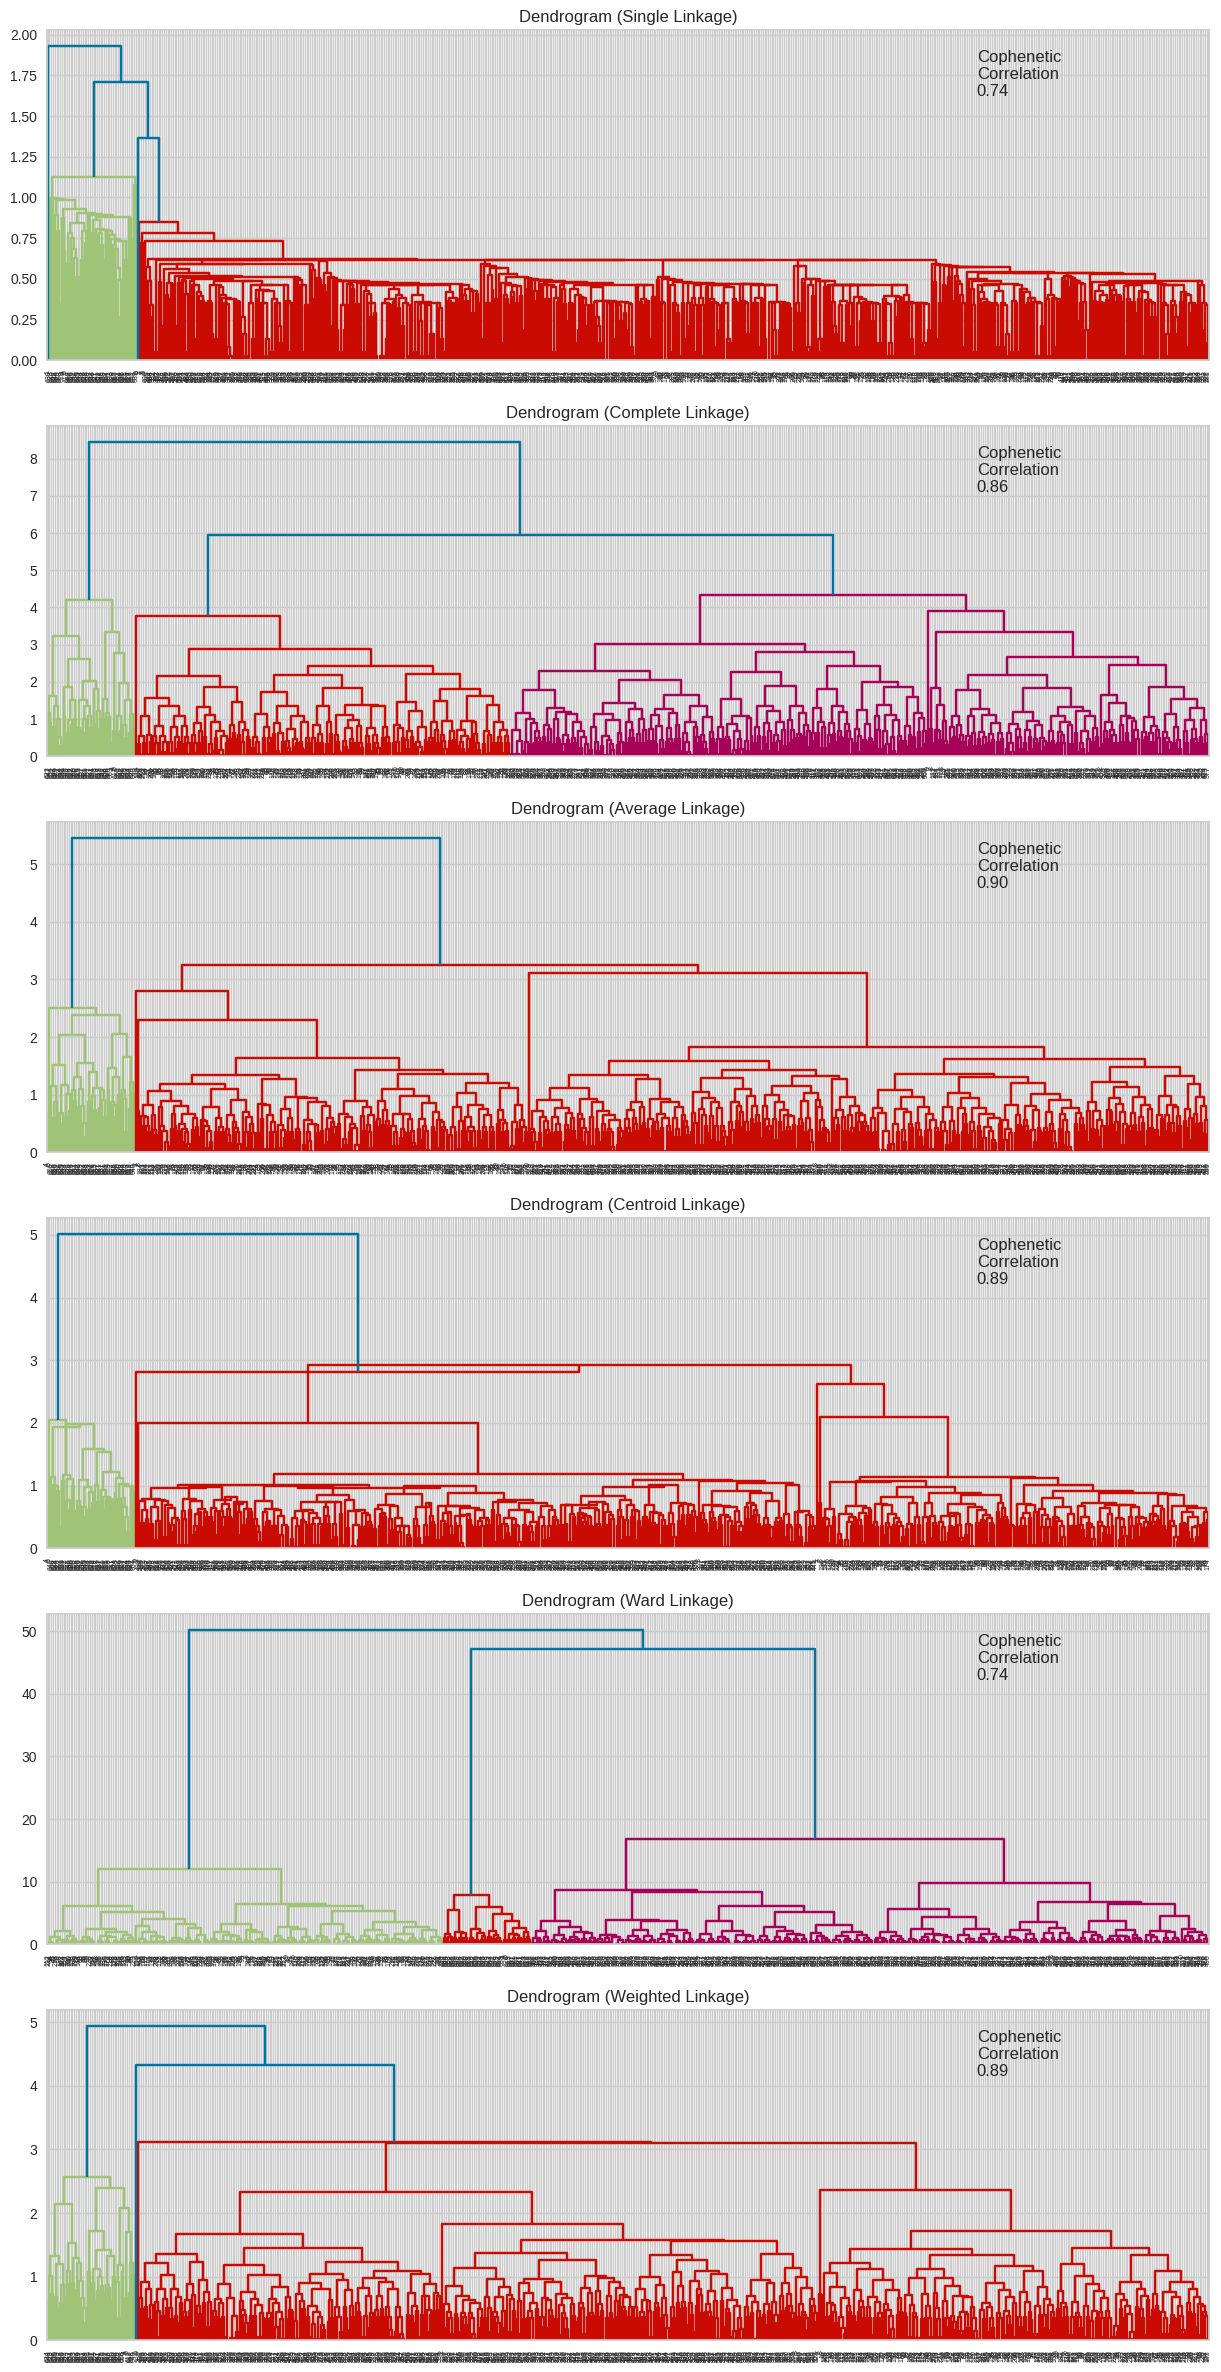

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 4 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
4,ward,0.741516
1,complete,0.859973
5,weighted,0.886175
3,centroid,0.893939
2,average,0.897708


### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4,  linkage='average')


In [ ]:
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
numeric_df2 = df2.select_dtypes(include=['number'])

hc_cluster_profile = numeric_df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Customer Key"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,,
0,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408,223
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,418.339378,54842.683938,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,1.000000,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000,1


In [ ]:
## Code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following Customer are present with Key Id:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Customer Key"].unique())
    print()

In cluster 3, the following Customer are present with Key Id:
[87073]

In cluster 0, the following Customer are present with Key Id:
[38414 58634 37376 82490 44770 52741 52326 92503 25084 68517 55196 62617
 96463 39137 14309 29794 87241 30507 61061 24001 68067 65034 14854 81130
 29112 13999 32550 82164 61517 28254 30888 46388 74126 52142 37659 83132
 20119 52363 50769 68502 99026 83326 62040 37252 74625 51182 60301 96386
 43886 78503 68419 32828 17937 71632 81566 29759 36929 70248 91673 61355
 60403 85868 76205 66524 69214 21976 35149 27120 18821 33187 93482 90168
 71881 59656 12026 99589 38970 57990 39447 79694 79403 47296 37559 38165
 49198 18007 59619 37016 91099 74704 25742 11937 52736 88338 18916 92501
 96213 26599 73007 97935 26089 14946 74795 73435 41634 84069 83244 87291
 18086 33369 15310 98499 35256 89007 93997 16577 25440 81116 63663 69811
 36111 39454 70199 11602 49697 28701 61627 34103 14248 31256 45583 52750
 95507 23743 53410 53898 66200 58389 61347 59151 37802 60475 954

In [ ]:
df2.groupby(["HC_segments"])['Customer Key'].count()

,Customer Key
HC_segments,
0,223
1,50
2,386
3,1


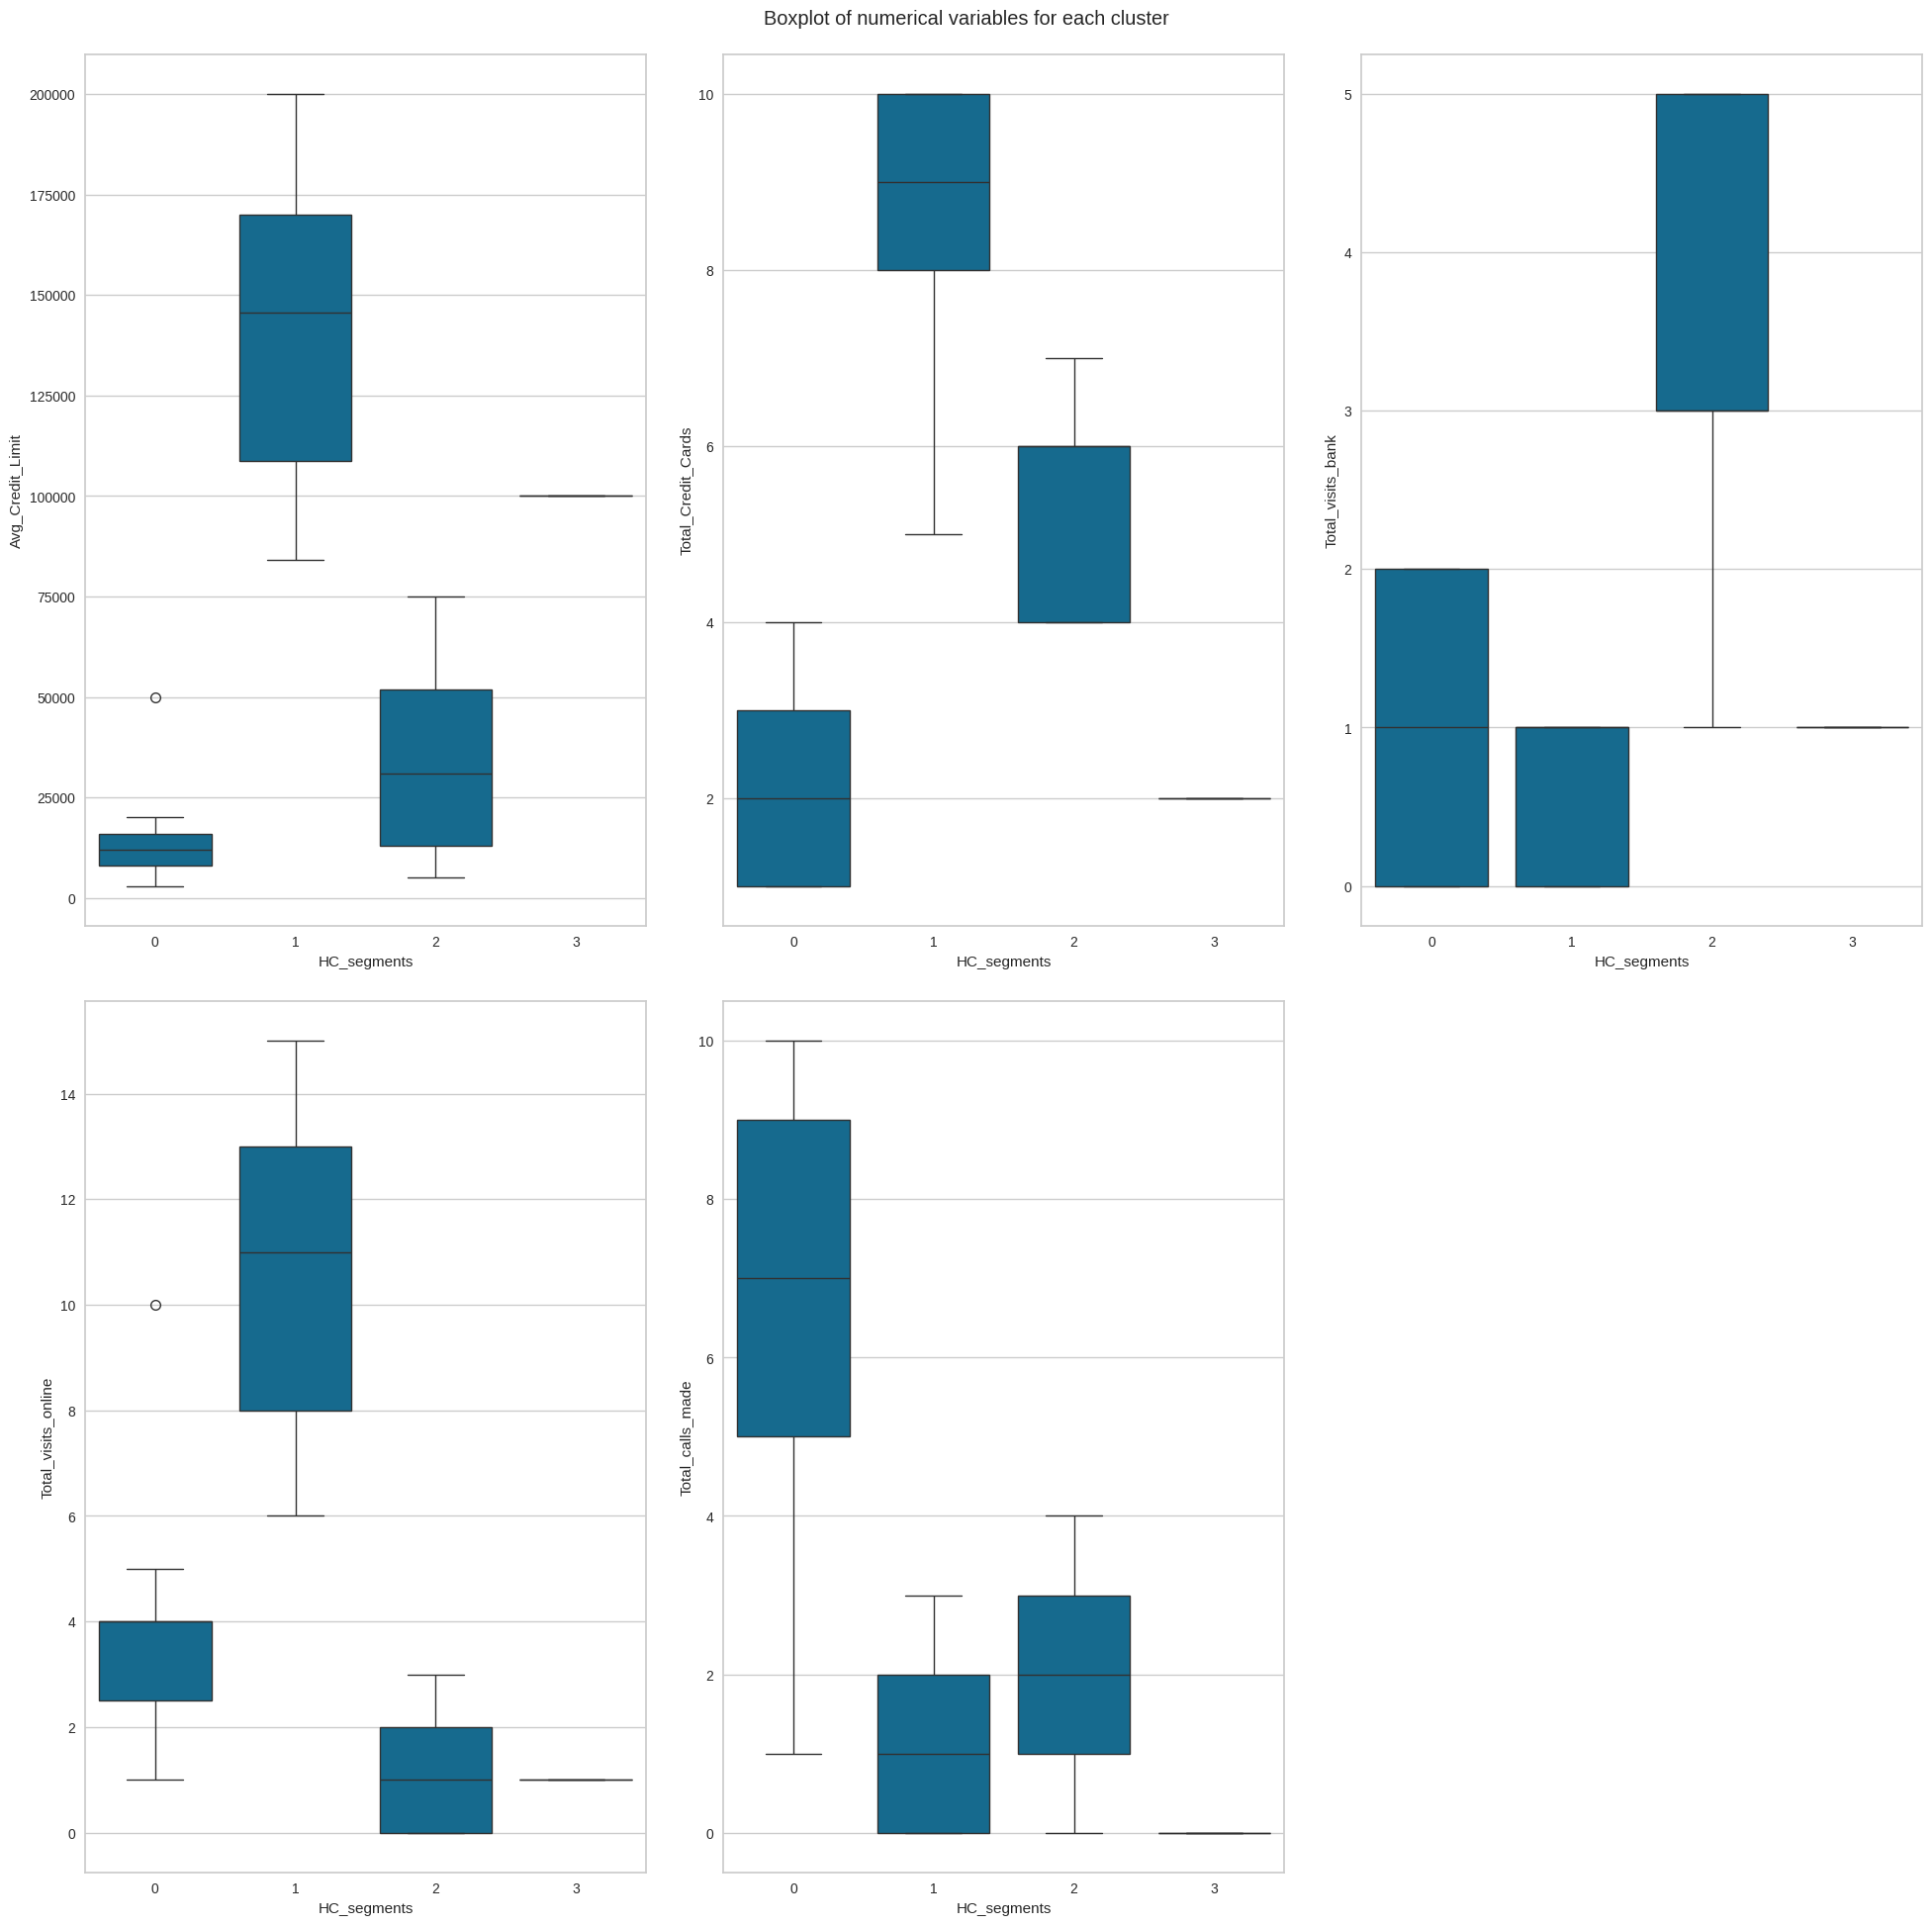

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

•	Cluster 0: Low-credit-limit customers with fewer cards, moderate online activity, and higher call frequency, suggesting a need for more support.

•	Cluster 1: High-spending, multi-card customers with high credit limits and infrequent interactions (infrequent bank visits and calls but more online interactions).

•	Cluster 2: Mid-range customers with moderate credit limits, high in-person bank visits, and limited online interactions.

•	Cluster 3: Customers with high credit limits but limited interactions across all channels.




# K-means vs Hierarchical Clustering

In [ ]:
import time

# Time K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)
kmeans_time = time.time() - start_time

# Time Hierarchical clustering
start_time = time.time()
HCmodel = AgglomerativeClustering(n_clusters=4, linkage='average')
HCmodel.fit(hc_df)
hierarchical_time = time.time() - start_time

print(f"K-means execution time: {kmeans_time:.4f} seconds")
print(f"Hierarchical clustering execution time: {hierarchical_time:.4f} seconds")

if kmeans_time < hierarchical_time:
  print("K-means clustering took less time for execution.")
else:
  print("Hierarchical clustering took less time for execution.")

K-means execution time: 0.0103 seconds
Hierarchical clustering execution time: 0.0137 seconds
K-means clustering took less time for execution.


•	K-means execution time is 0.0103 seconds and Hierarchical clustering execution time is 0.0137 seconds which means K-means clustering took less time for execution.


•	While both K-means and Hierarchical clustering techniques provided meaningful insights, the Hierarchical clustering, specifically with Ward linkage, appears to generate more distinct and interpretable clusters.

•	This can be seen by visualizing the dendrogram and profiling the clusters. The Ward linkage method effectively identifies the subgroups within the data, leading to clearer cluster separation compared to K-means.

•	Therefore, the Hierarchical clustering using Ward linkage method provides more distinct clusters in this specific case.


# Actionable Insights and Recommendations

•	Targeted Marketing Campaigns:

High Credit Limit & Multiple Cards Segment: Offer exclusive benefits, higher credit limits, or premium card options to this high-value segment.
o	Frequent Online and Call Users: Promote digital financial products or app-based services to customers with high online and call interaction frequencies, enhancing convenience and engagement.

•	Service Delivery Enhancements:

Digital-first Strategy: Given the low frequency of bank visits, strengthen the online portal and mobile app to provide comprehensive support. Include features such as live chat or AI-driven help to reduce call volumes.
o	Improved Call Center Support: For frequent callers, consider expanding call center capabilities to reduce wait times and improve satisfaction. Offering callbacks or priority queues for frequent callers could enhance the customer experience.

K-Means Clusters insights -

•	Marketing Strategy: Cluster 2 represents high-value customers who prefer online services, making them prime candidates for digital marketing campaigns and exclusive online services. Clusters 0 and 1 may benefit from targeted campaigns that promote in-person or personalized support options.

•	Service Improvements: Cluster 1 has a high frequency of calls, indicating possible dissatisfaction or high support needs. Enhancing support channels or proactively addressing common issues for these customers could improve satisfaction and reduce call volumes.

•	Upsell Opportunities: Cluster 0, with moderate credit limits and credit card holdings, could be targeted for cross-selling additional credit products. Their higher bank visit frequency suggests potential interest in personalized in-branch or high-touch services.

Hierarchical Clusters insights -

•	Cluster 0 may need enhanced support services through digital channels and call centers.

•	Cluster 1 could benefit from exclusive loyalty programs and high-value incentives due to their high spending and online presence.

•	Cluster 2 might respond well to incentives for in-person engagement, perhaps via personalized consultations or special in-branch services.

•	Cluster 3 could benefit from incentives to increase engagement, such as online self-service tutorials and targeted product recommendations.


___